In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Opsi tampilan inline untuk Jupyter
%matplotlib inline

In [2]:
# Parameter yang bisa kamu ubah
K_MIN = 1
K_MAX = 10
TRUE_CENTERS = 4     # jumlah pusat data sintetis (ground truth untuk contoh)
N_SAMPLES = 1200
CLUSTER_STD = 0.7
RANDOM_SEED = 42
K_ELBOW = 4          # k yang akan dipakai untuk plot clustering

In [3]:
# 1) Generate synthetic data
X, _ = make_blobs(
    n_samples=N_SAMPLES,
    centers=TRUE_CENTERS,
    cluster_std=CLUSTER_STD,
    random_state=RANDOM_SEED,
)
X[:5], X.shape

(array([[-7.15135096, -6.76081824],
        [-9.58924787,  7.49099572],
        [ 5.74557934,  1.60716766],
        [-3.62529698,  8.59472361],
        [-2.2562207 , 10.09091172]]),
 (1200, 2))

In [4]:
# 2) Compute WCSS (inertia) for k=K_MIN..K_MAX
K = list(range(K_MIN, K_MAX + 1))
wcss = []
for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=RANDOM_SEED)
    km.fit(X)
    wcss.append(km.inertia_)

list(zip(K, [round(v, 2) for v in wcss]))[:5]


[(1, 79450.95), (2, 36940.39), (3, 7645.62), (4, 1139.87), (5, 1033.49)]

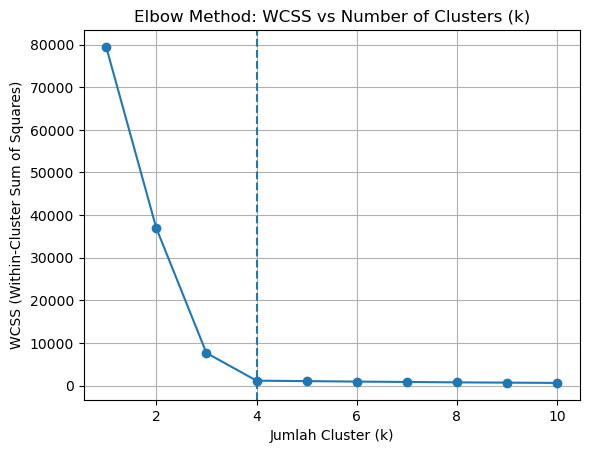

In [5]:
# 3) Plot Elbow curve
plt.figure()
plt.plot(K, wcss, marker="o")
plt.title("Elbow Method: WCSS vs Number of Clusters (k)")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.axvline(x=K_ELBOW, linestyle="--")
plt.show()


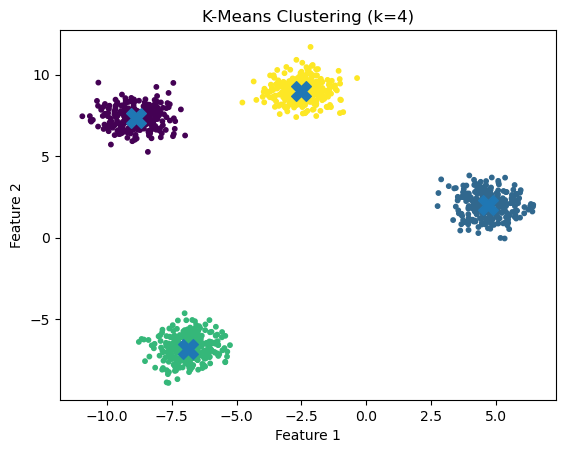

In [6]:
# 4) Fit KMeans with k=K_ELBOW and plot clusters
km_elbow = KMeans(n_clusters=K_ELBOW, n_init=10, random_state=RANDOM_SEED)
labels = km_elbow.fit_predict(X)
centers = km_elbow.cluster_centers_

plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=10, c=labels)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker="X")
plt.title(f"K-Means Clustering (k={K_ELBOW})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
